In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [6]:
df.isna().sum().sum()

0

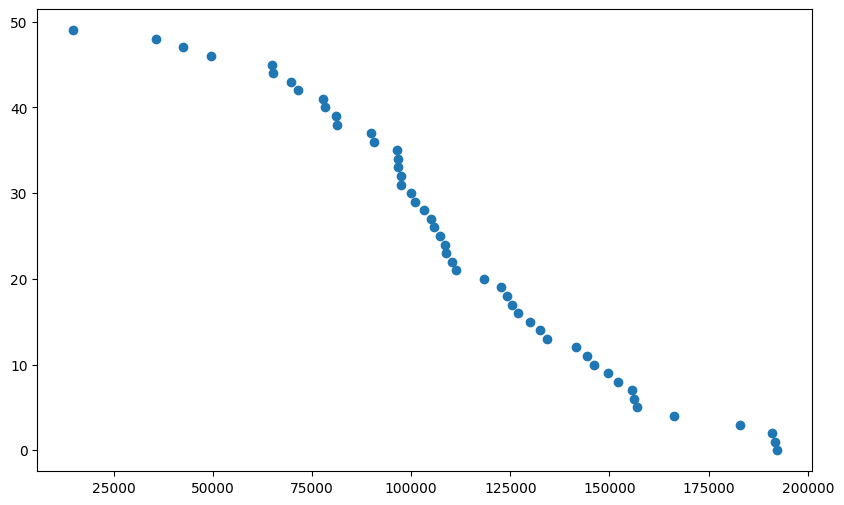

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['PROFIT'],df.index)
plt.show()

In [9]:
data = df[['PROFIT']]
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

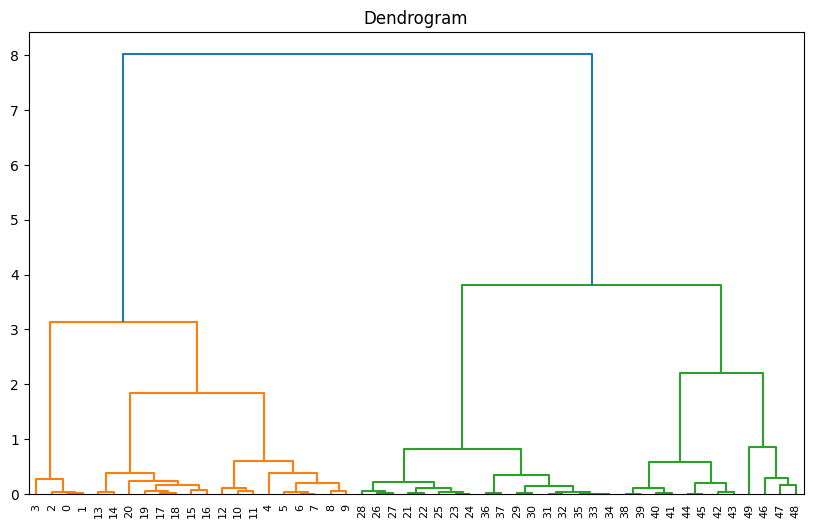

In [11]:
plt.figure(figsize=(10,6))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(scaled_data,method='ward'))

In [13]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
pred = cluster.fit_predict(scaled_data)
pred

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
df['Cluster'] = pred
df['Cluster'].value_counts()

Cluster
0    29
1    21
Name: count, dtype: int64

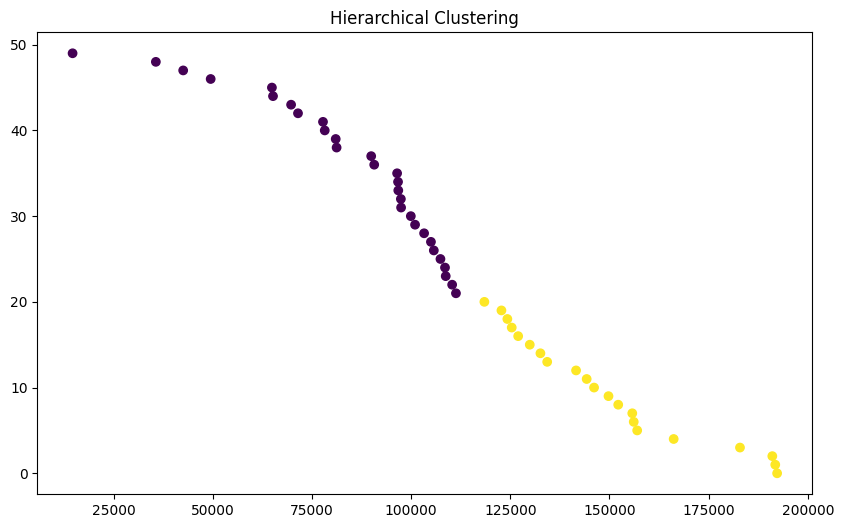

In [18]:
plt.figure(figsize=(10,6))
plt.title("Hierarchical Clustering")
plt.scatter(df['PROFIT'],df.index,c=df['Cluster'])
# plt.scatter(df['RND'],df[['PROFIT']],c=df['Cluster'])
plt.show()